In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

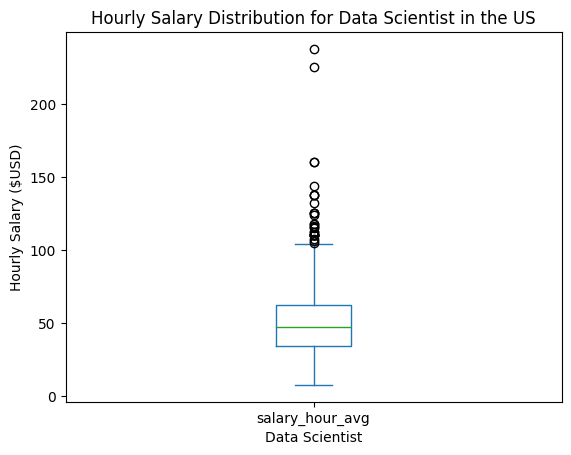

In [11]:
# Filter out data
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_hour_avg'])

# Plot the boxplot
df_DS_US['salary_hour_avg'].plot(kind='box')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22972\1895094252.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_data, labels = countries)


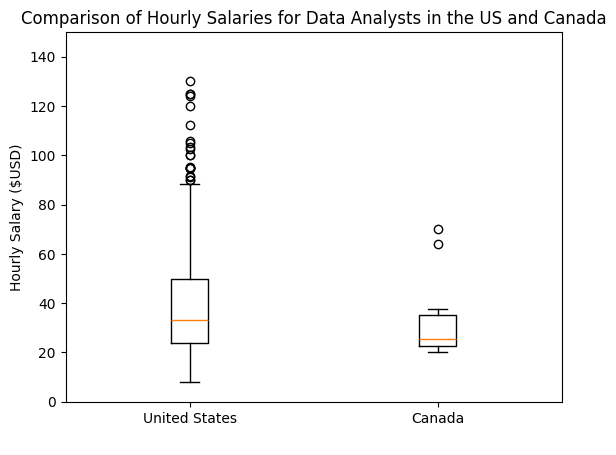

In [21]:
countries = ['United States', 'Canada']
df_US_CA = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_hour_avg']).copy()


country_data = [df_US_CA[df_US_CA['job_country'] == country]['salary_hour_avg'] for country in countries]
            
plt.boxplot(country_data, labels = countries)
plt.ylim(0, 150)
plt.ylabel('Hourly Salary ($USD)')
plt.xlabel(' ')
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22972\3078726446.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list, labels=job_titles)


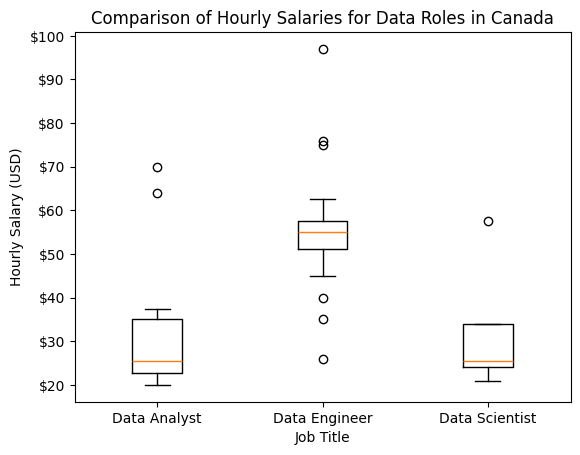

In [24]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_CA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].copy()
df_CA = df_CA.dropna(subset = ['salary_hour_avg'])

job_list = [df_CA[df_CA['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]
fig, ax = plt.subplots()
ax.boxplot(job_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary (USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()